In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IMPORT LIBRARY

In [2]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# FUNCTION

    PLOT

In [3]:
def plot_func(point0, point1, point2,  a, b, method):
    plt.figure(figsize=(20,8))
    plt.suptitle("Hierarchical Clustering", fontsize=18)

    plt.subplot(1,2,1)
    plt.title('DEFAULT')
    plt.xlabel(a)
    plt.ylabel(b)
    plt.plot(df[df['Species'] == 0][a], df[df['Species'] == 0][b], 'go', label='Iris-setosa')
    plt.plot(df[df['Species'] == 1][a], df[df['Species'] == 1][b], 'ro', label='Iris-versicolor')
    plt.plot(df[df['Species'] == 2][a], df[df['Species'] == 2][b], 'bo', label='Iris-virginica')
    plt.legend(loc='lower right')

    plt.subplot(1,2,2)
    plt.title("Agglomerative Clustering ('" + method + "' method)")
    plt.xlabel(a)
    plt.ylabel(b)
    plt.plot(point0[a], point0[b], 'co')
    plt.plot(point1[a], point1[b], 'yo')
    plt.plot(point2[a], point2[b], 'ko')

    plt.show()

In [4]:
def plot_func_kmeans(point0, point1, point2,  a, b):
    plt.figure(figsize=(20,8))
    plt.suptitle("K-MEANS CLUSTERING", fontsize=18)

    plt.subplot(1,2,1)
    plt.title('DEFAULT')
    plt.xlabel(a)
    plt.ylabel(b)
    plt.plot(df[df['Species'] == 0][a], df[df['Species'] == 0][b], 'go', label='Iris-setosa')
    plt.plot(df[df['Species'] == 1][a], df[df['Species'] == 1][b], 'ro', label='Iris-versicolor')
    plt.plot(df[df['Species'] == 2][a], df[df['Species'] == 2][b], 'bo', label='Iris-virginica')
    plt.legend(loc='lower right')

    plt.subplot(1,2,2)
    plt.title("K-Means Clustering")
    plt.xlabel(a)
    plt.ylabel(b)
    plt.plot(point0[a], point0[b], 'co')
    plt.plot(point1[a], point1[b], 'yo')
    plt.plot(point2[a], point2[b], 'ko')

    plt.show()

    DENDROGRAM PLOT FUNCTION

In [5]:
def dend_plot_func(method):
    linkage_method = linkage(X, method)
    plt.figure(figsize=(30, 20))
    dendrogram(linkage_method)
    plt.xlabel('Index', fontsize=18)
    plt.ylabel('Distance', fontsize=18)
    plt.suptitle("DENDROGRAM " + method.upper() + " METHOD", fontsize=50)
    plt.show()

# READ DATA

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Iris.csv')
#df = pd.read_csv('Iris.csv')

In [7]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
label = []
for i in df.Species:
    if (i == 'Iris-setosa'):
        label.append(0)
    elif (i == 'Iris-versicolor'):
        label.append(1)
    else:
        label.append(2)

df['Species'] = label
df = shuffle(df)
df.reset_index(inplace=True)
df['ID'] = [i for i in range(150)]
df = df[['ID', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]
df

,ID,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,4.9,3.1,1.5,0.1,0
1,1,7.9,3.8,6.4,2.0,2
2,2,6.7,3.1,4.7,1.5,1
3,3,6.5,3.0,5.2,2.0,2
4,4,6.6,2.9,4.6,1.3,1
...,...,...,...,...,...,...
145,145,6.4,3.2,4.5,1.5,1
146,146,5.7,2.8,4.1,1.3,1
147,147,6.3,2.3,4.4,1.3,1
148,148,6.3,3.3,4.7,1.6,1


# CLUSTERING

In [9]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, 5:].values

In [10]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
pred_label = kmeans.predict(X)
df['clus_kmean'] = pred_label

## 1. AGGLOMERATIVE CLUSTERING ('WARD' METHOD)

In [11]:
clustering0 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(X)
clus0 = clustering0.labels_
df['clus0'] = clus0

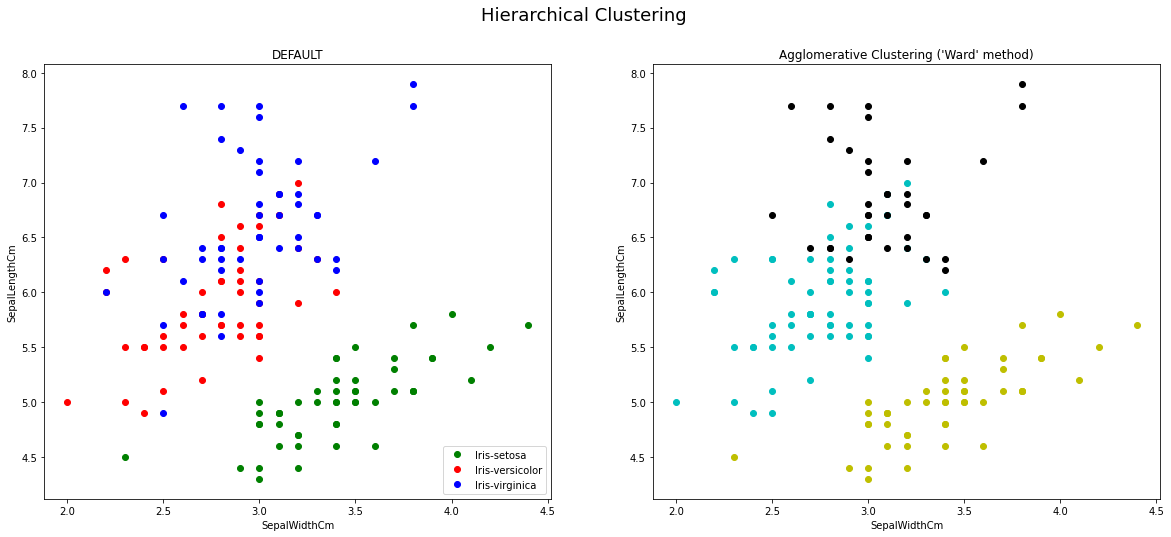

In [12]:
plot_func(df[df['clus0'] == 0], df[df['clus0'] == 1], df[df['clus0'] == 2], 'SepalWidthCm', 'SepalLengthCm', 'Ward')

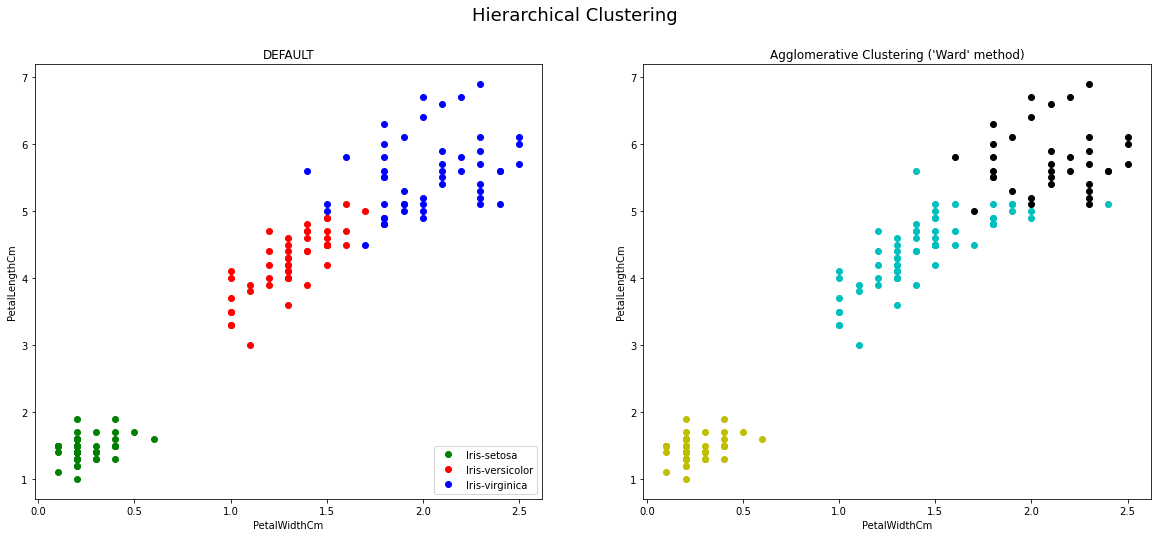

In [13]:
plot_func(df[df['clus0'] == 0], df[df['clus0'] == 1], df[df['clus0'] == 2], 'PetalWidthCm', 'PetalLengthCm', 'Ward')

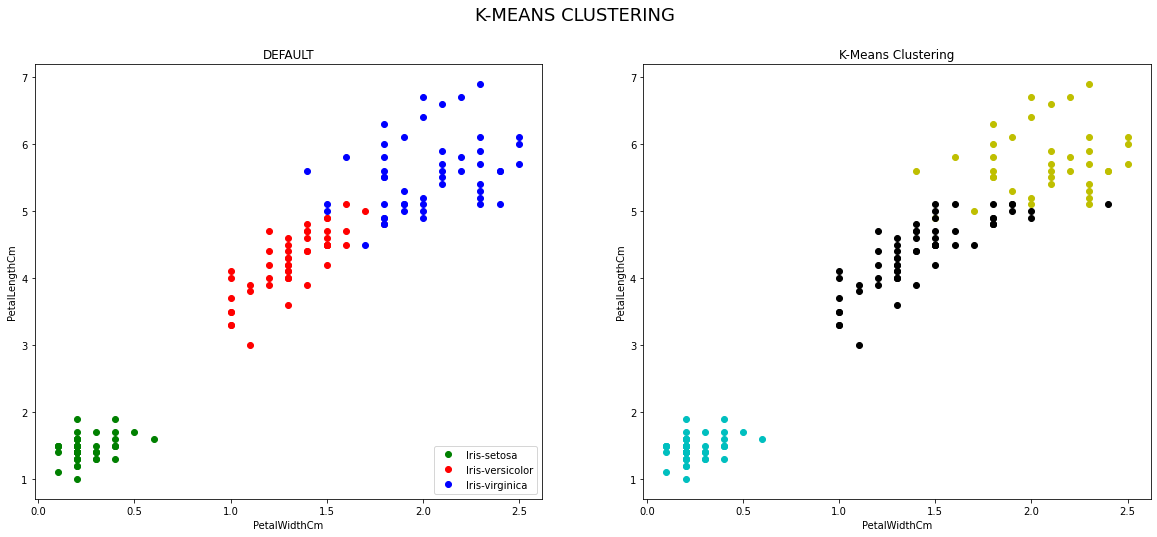

In [14]:
plot_func_kmeans(df[df['clus_kmean'] == 0], df[df['clus_kmean'] == 1], df[df['clus_kmean'] == 2], 'PetalWidthCm', 'PetalLengthCm')

In [15]:
df[df['clus0'] == 0]

,ID,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clus_kmean,clus0
2,2,6.7,3.1,4.7,1.5,1,2,0
4,4,6.6,2.9,4.6,1.3,1,2,0
5,5,5.8,2.7,3.9,1.2,1,2,0
13,13,5.0,2.0,3.5,1.0,1,2,0
14,14,5.5,2.6,4.4,1.2,1,2,0
...,...,...,...,...,...,...,...,...
145,145,6.4,3.2,4.5,1.5,1,2,0
146,146,5.7,2.8,4.1,1.3,1,2,0
147,147,6.3,2.3,4.4,1.3,1,2,0
148,148,6.3,3.3,4.7,1.6,1,2,0


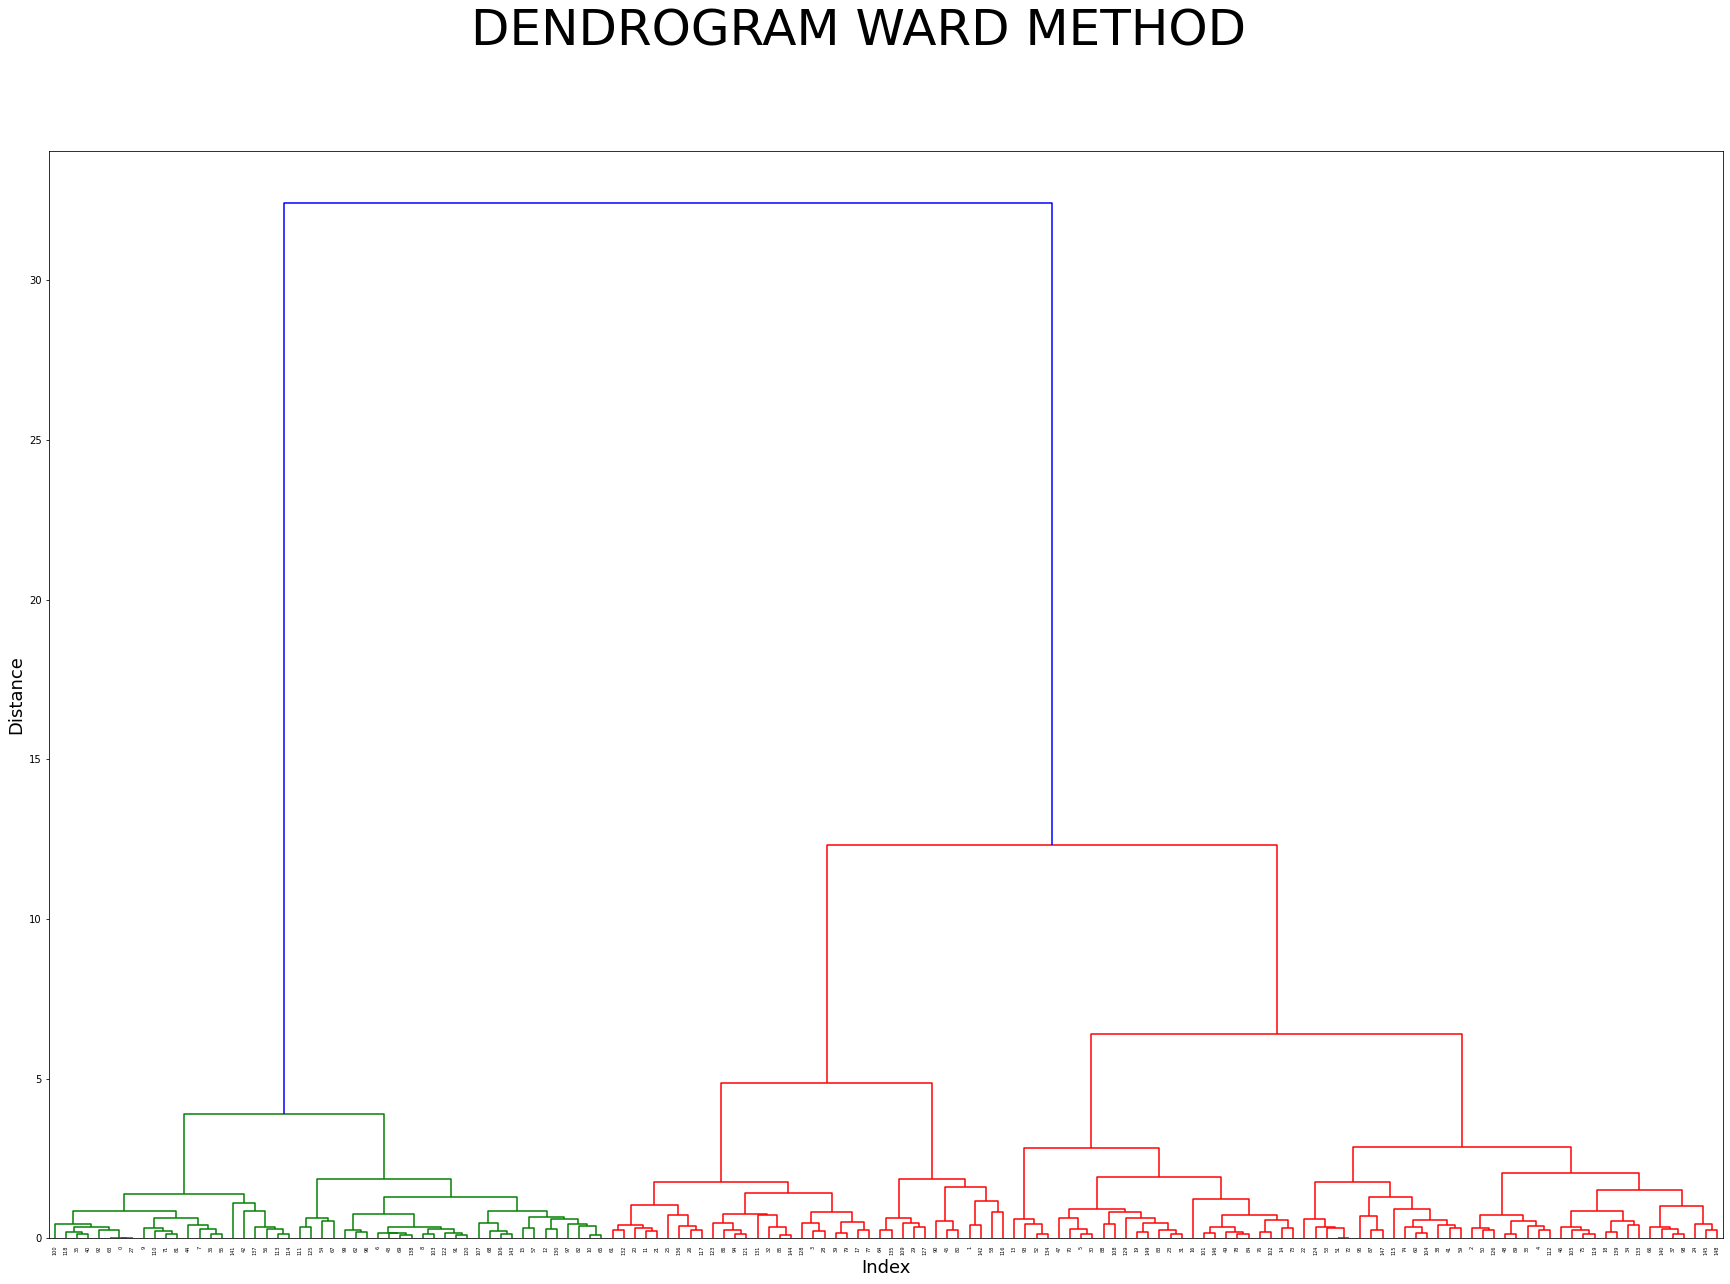

In [16]:
dend_plot_func("ward")

## 2. AGGLOMERATIVE CLUSTERING ('SINGLE' METHOD)

---



In [17]:
clustering1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single').fit(X)
clus1 = clustering1.labels_
df['clus1'] = clus1

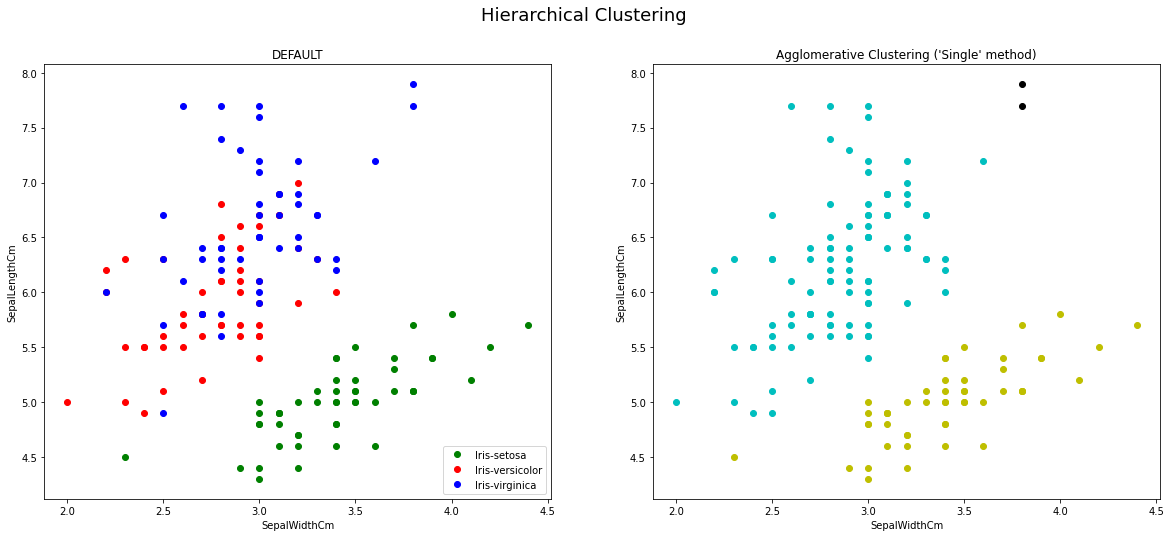

In [18]:
plot_func(df[df['clus1'] == 0], df[df['clus1'] == 1], df[df['clus1'] == 2], 'SepalWidthCm', 'SepalLengthCm' , 'Single')

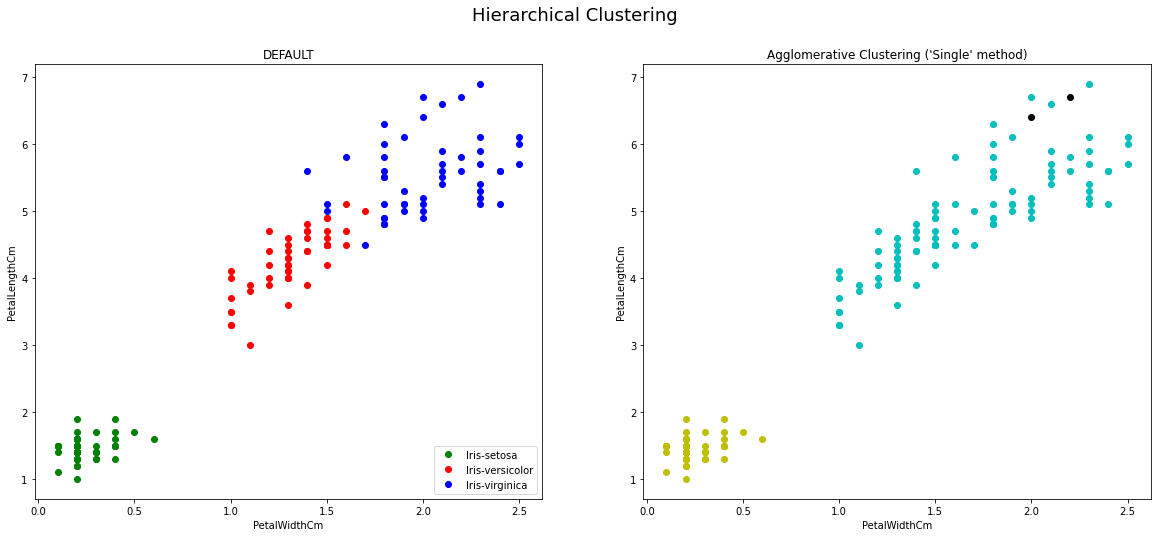

In [19]:
plot_func(df[df['clus1'] == 0], df[df['clus1'] == 1], df[df['clus1'] == 2], 'PetalWidthCm', 'PetalLengthCm', 'Single')

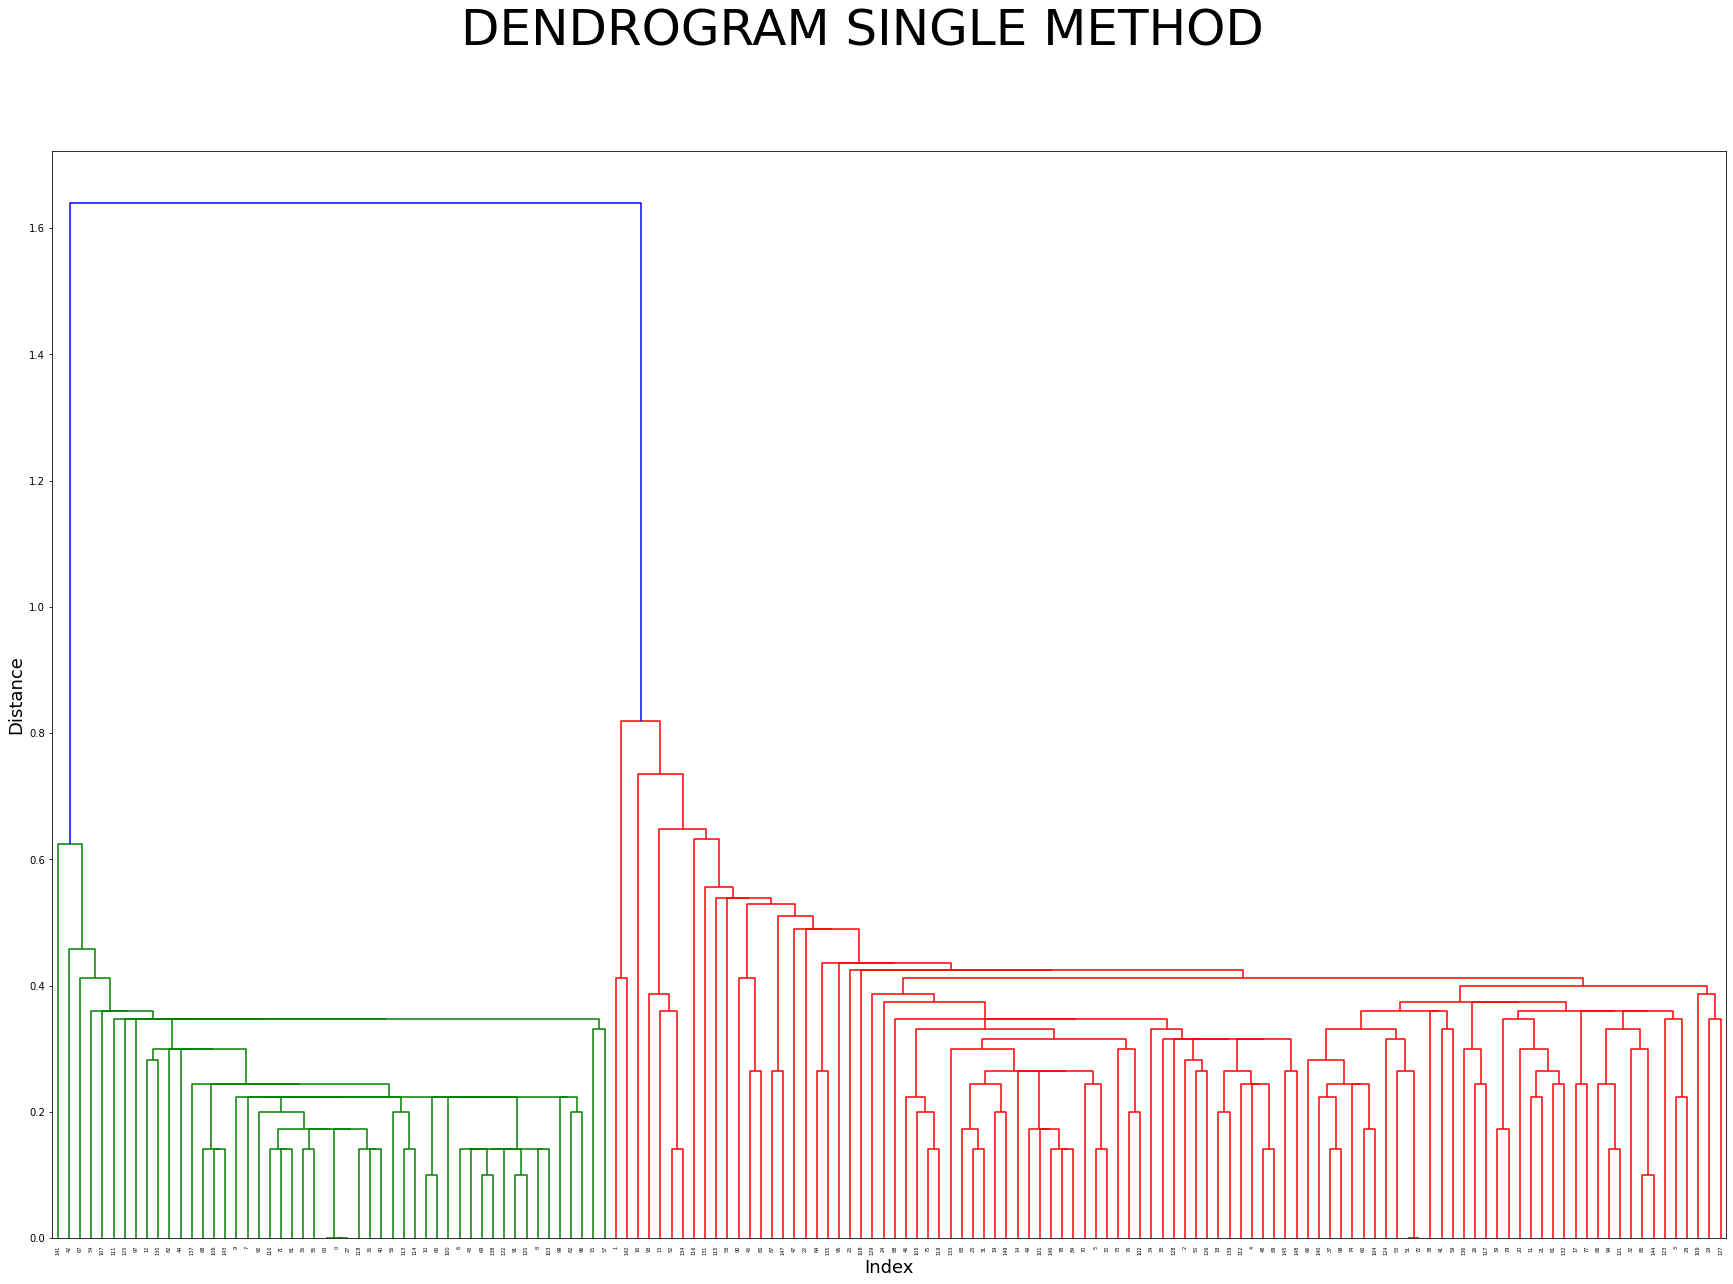

In [20]:
dend_plot_func("single")

## 3. AGGLOMERATIVE CLUSTERING ('COMPLETE' METHOD)

In [21]:
clustering2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete').fit(X)
clus2 = clustering2.labels_
df['clus2'] = clus2

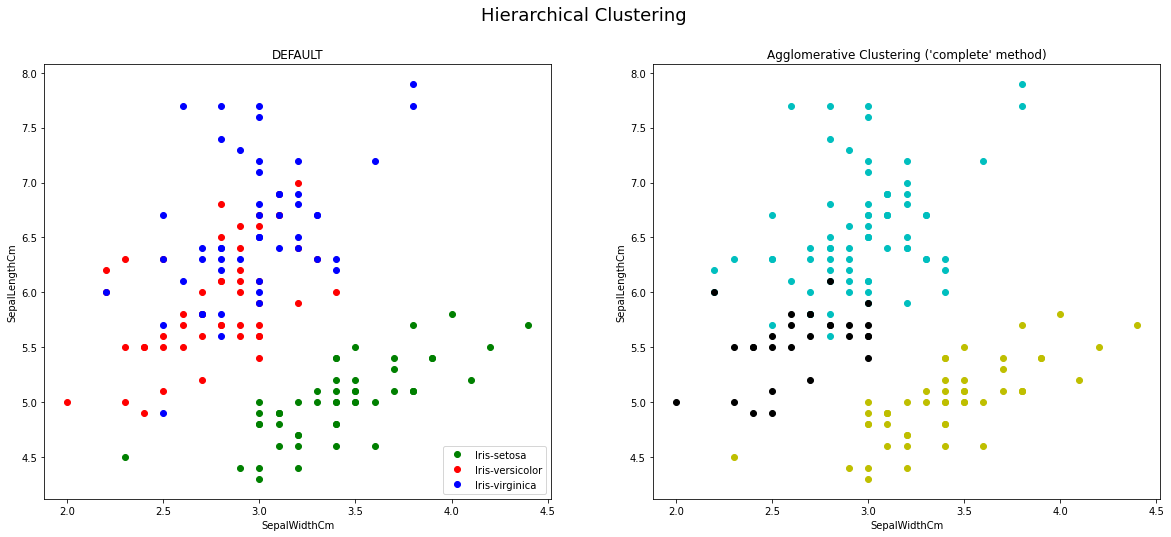

In [22]:
plot_func(df[df['clus2'] == 0], df[df['clus2'] == 1], df[df['clus2'] == 2], 'SepalWidthCm', 'SepalLengthCm' , 'complete')

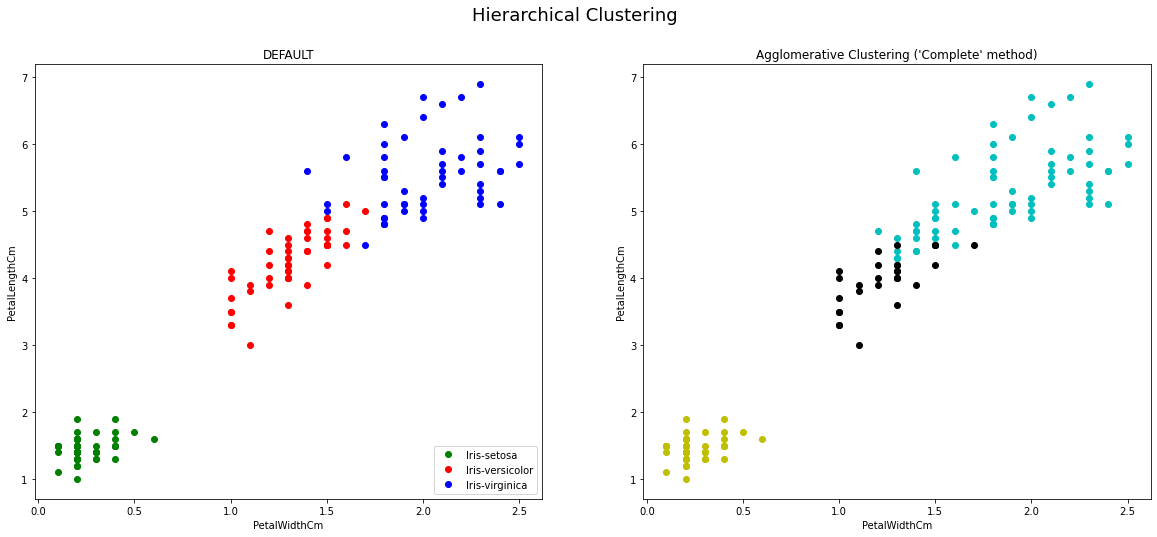

In [23]:
plot_func(df[df['clus2'] == 0], df[df['clus2'] == 1], df[df['clus2'] == 2], 'PetalWidthCm', 'PetalLengthCm', 'Complete')

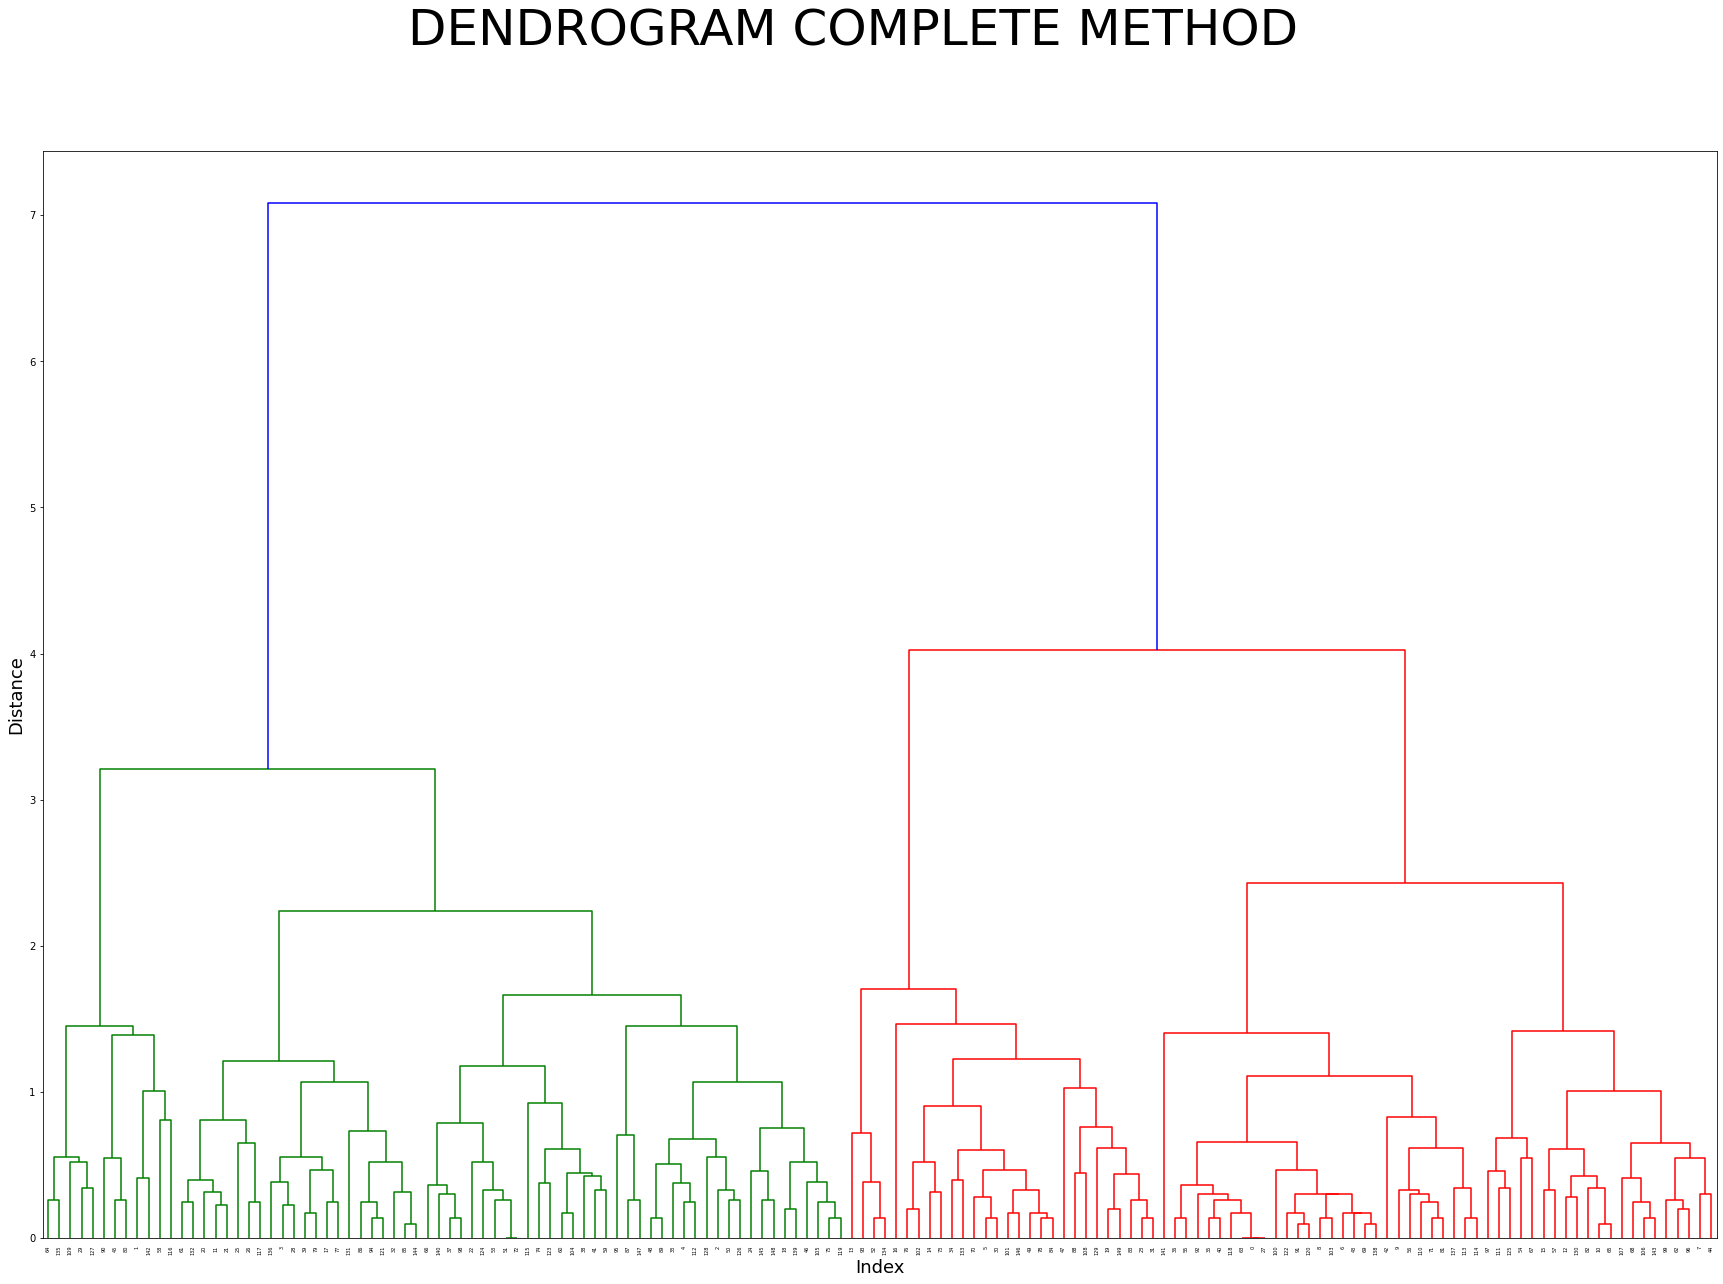

In [24]:
dend_plot_func("complete")

In [25]:
clustering1_2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete').fit(X)
clus1_2 = clustering1_2.labels_
df['clus1_2'] = clus1_2

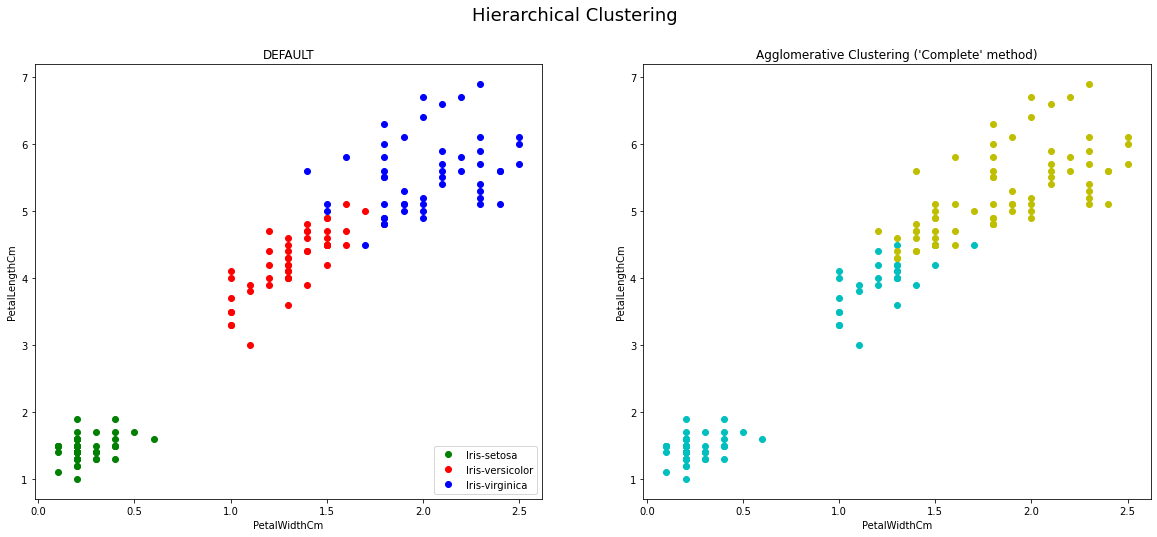

In [26]:
plot_func(df[df['clus1_2'] == 0], df[df['clus1_2'] == 1], df[df['clus1_2'] == 2], 'PetalWidthCm', 'PetalLengthCm', 'Complete')

In [27]:
clustering1_4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete').fit(X)
clus1_4 = clustering1_4.labels_
df['clus1_4'] = clus1_4

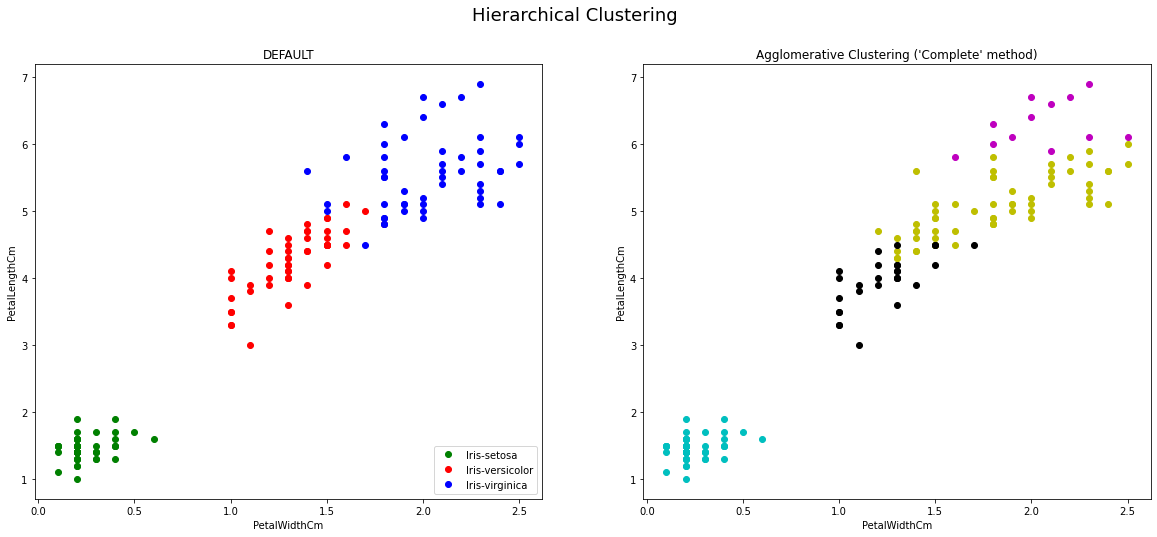

In [28]:
plt.figure(figsize=(20,8))
plt.suptitle("Hierarchical Clustering", fontsize=18)

plt.subplot(1,2,1)
plt.title('DEFAULT')
plt.xlabel('PetalWidthCm')
plt.ylabel('PetalLengthCm')
plt.plot(df[df['Species'] == 0]['PetalWidthCm'], df[df['Species'] == 0]['PetalLengthCm'], 'go', label='Iris-setosa')
plt.plot(df[df['Species'] == 1]['PetalWidthCm'], df[df['Species'] == 1]['PetalLengthCm'], 'ro', label='Iris-versicolor')
plt.plot(df[df['Species'] == 2]['PetalWidthCm'], df[df['Species'] == 2]['PetalLengthCm'], 'bo', label='Iris-virginica')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.title("Agglomerative Clustering ('" + 'Complete' + "' method)")
plt.xlabel('PetalWidthCm')
plt.ylabel('PetalLengthCm')
plt.plot(df[df['clus1_4'] == 0]['PetalWidthCm'], df[df['clus1_4'] == 0]['PetalLengthCm'], 'co')
plt.plot(df[df['clus1_4'] == 1]['PetalWidthCm'], df[df['clus1_4'] == 1]['PetalLengthCm'], 'yo')
plt.plot(df[df['clus1_4'] == 2]['PetalWidthCm'], df[df['clus1_4'] == 2]['PetalLengthCm'], 'ko')
plt.plot(df[df['clus1_4'] == 3]['PetalWidthCm'], df[df['clus1_4'] == 3]['PetalLengthCm'], 'mo')

plt.show()

## 4. AGGLOMERATIVE CLUSTERING ('AVERAGE' METHOD)

In [29]:
clustering3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average').fit(X)
clus3 = clustering3.labels_
df['clus3'] = clus3

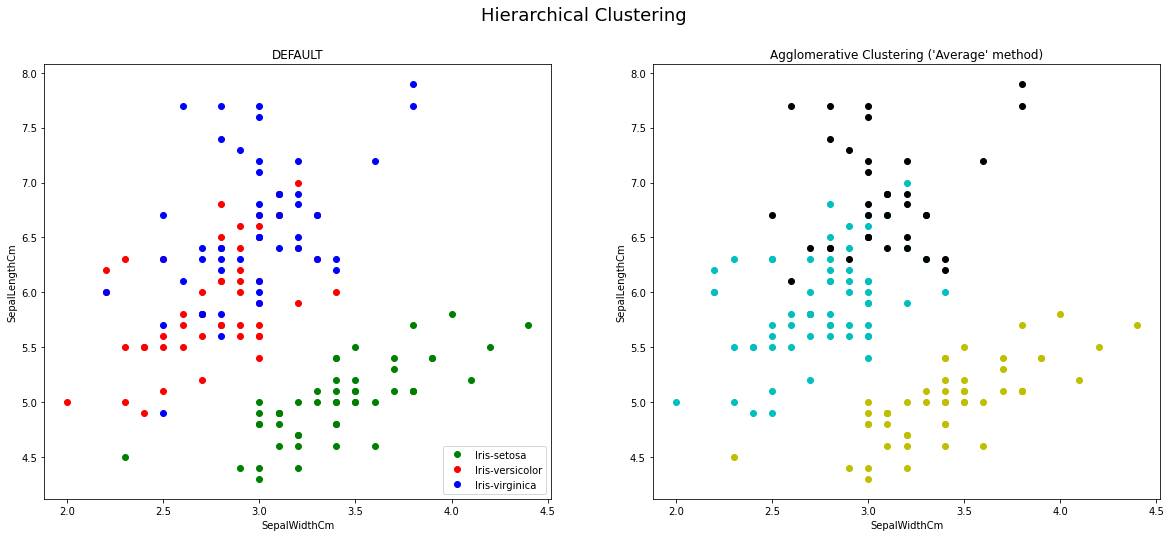

In [30]:
plot_func(df[df['clus3'] == 0], df[df['clus3'] == 1], df[df['clus3'] == 2], 'SepalWidthCm', 'SepalLengthCm' , 'Average')

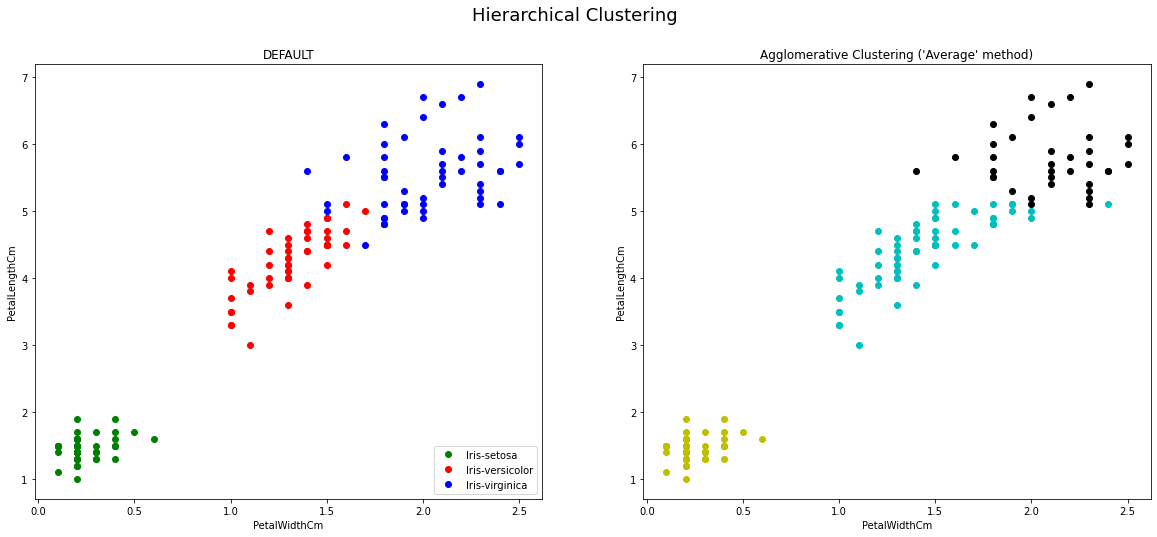

In [31]:
plot_func(df[df['clus3'] == 0], df[df['clus3'] == 1], df[df['clus3'] == 2], 'PetalWidthCm', 'PetalLengthCm', 'Average')

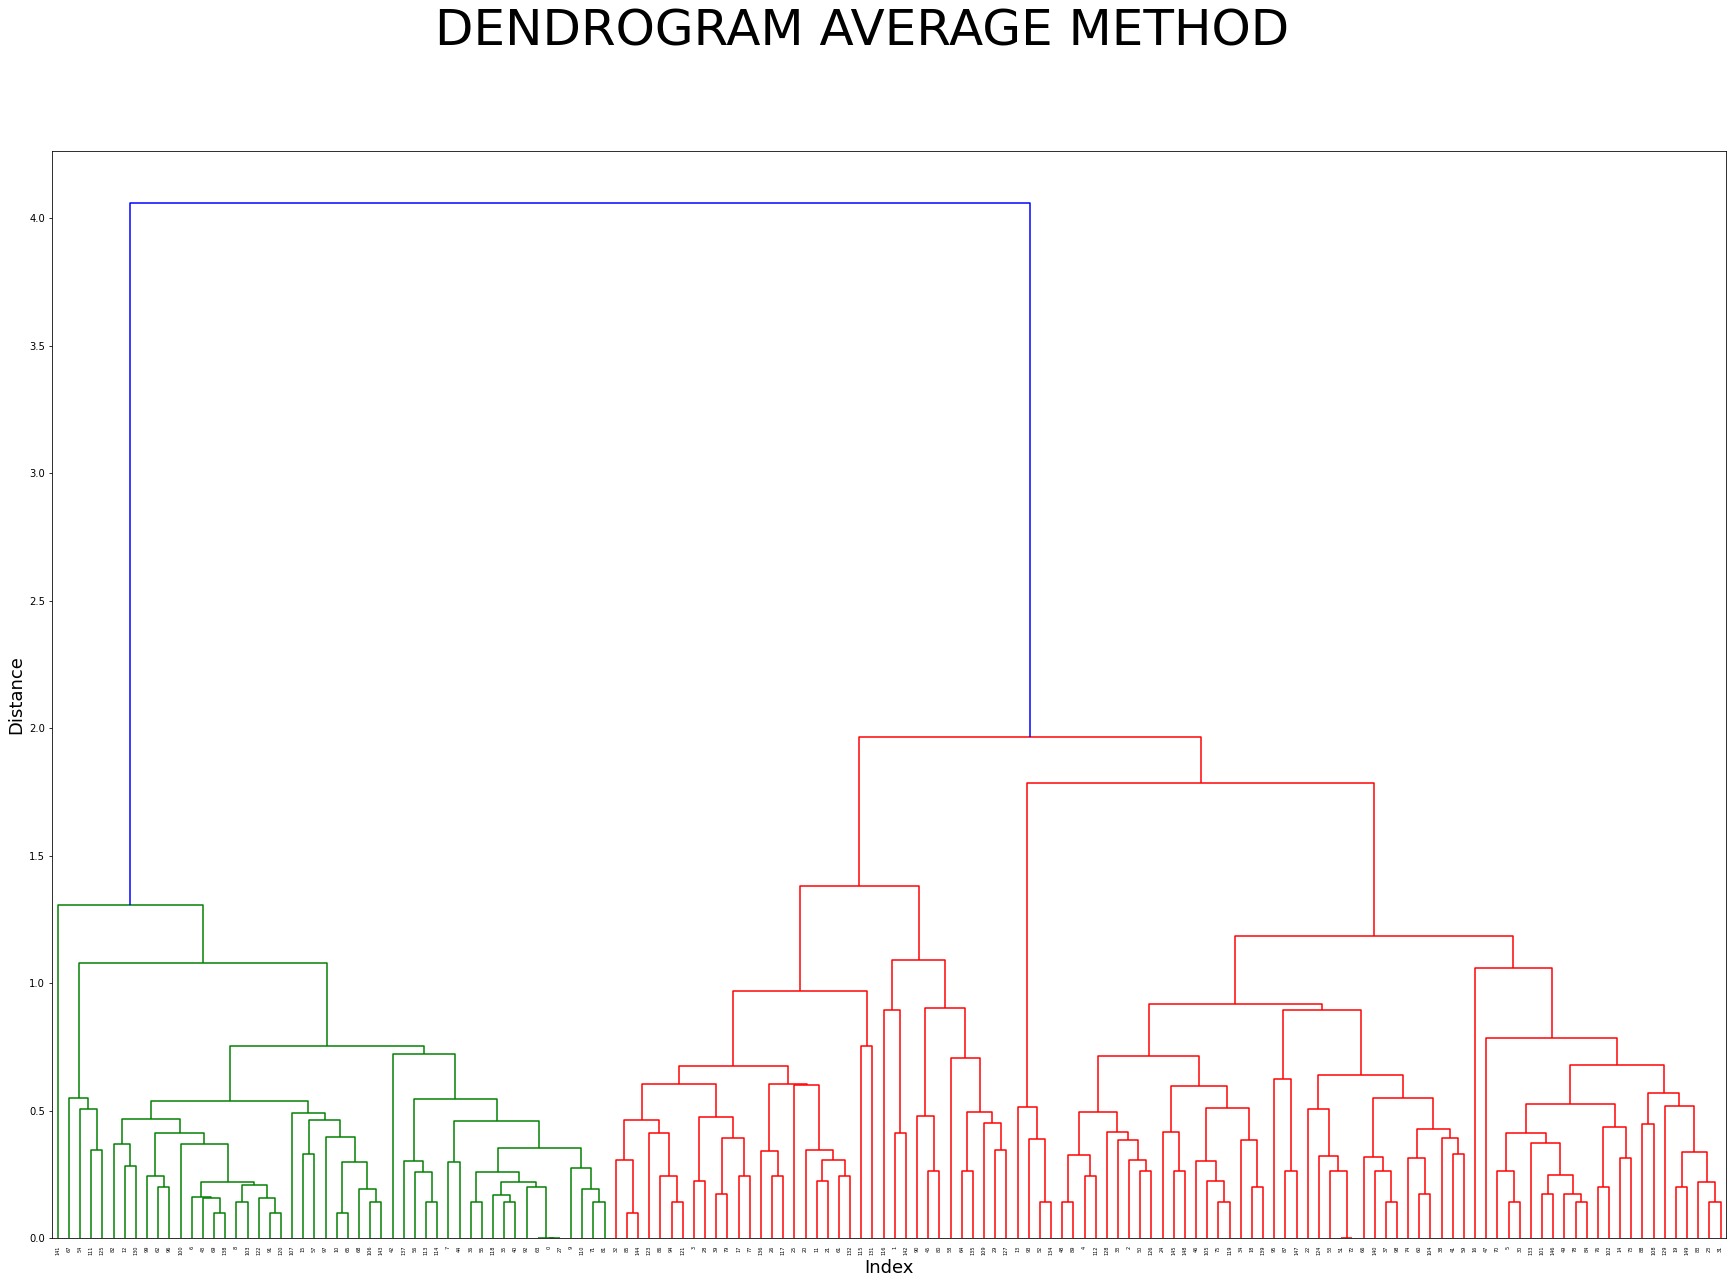

In [32]:
dend_plot_func("average")